In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



# Understanding The Dataset

The main reason for the dataset is to tell us about the efficiency of fuel consumption of vehicles. The goal of this project is to predict the MPG(miles per gallon) for a vehicle given specific attributes of that vehicle. Within the data, the input to our algorithm is the {Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, Origin}. We then use a {Linear regression, Decision Tree Regression, Random Forest Regresion, SVM} to output a predicited {MPG(Miles per gallon}. 

The problem will be a regression problem, since the output variable is a continuous value, MPG. Therefore, I will be using Linear Regression, Decision Tree Regression, Random Forest Regression and SVM algorithms on the data.

# Personal Objective 

After university, I will be working as a Software Develoepr at a car company and believe that working with data on cars would be beneficial for me. I lack knowledge about cars and believe that by working on a dataset on cars and the features of cars I will understand more about which attributes would affect MPG of cars. I will also be working with datasets on cars within my future job and believe that this will be good practice for me.

# Other Benefits

As people begin to buy cars or figure out what the most beneficial car one can get for the price, looking at MPG(miles per gallon) will be important as it will be able to save people a plethora of money. When purchasing a car or renting a car, a lot of research must go into which car will be the most affordable and by utilizing this, one can figure out the MPG one can get based on specific attributes of a car.

# Related Work 

There are similar works that do end to end machine learning to make predictions of car MPG based off of specific car features. Many of these other projects use Linear Regression, Decision Tree, and Random Forest but I have only seen a few that utilize hyperparameter tuning and I will be utilizing that within this project. 

# Explore The Data

I am using a dataset from UCI, citation: https://archive.ics.uci.edu/ml/datasets/auto+mpg

As shown in the table below, there are 8 attributes, {Cylinders, Displacement, Horspower, Weight, Acceleration, Model Year, Origin, and MPG} with MPG being the output based on the other attributes. 

In [2]:
#Read in auto_mpg dataset 
df = pd.read_csv('./auto-mpg.data', na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

df.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
data_mpg = df.copy()
data_mpg.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1


As seen with the information below, there are a total of 297 samples with the attributes being all numeric, either float or int type. However, as seen with the attribute of Horsepower, there are only 391 non-null counts meaning there are 6 missing values within Horsepower.

In [3]:
data_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           397 non-null    float64
 1   Cylinders     397 non-null    int64  
 2   Displacement  397 non-null    float64
 3   Horsepower    391 non-null    float64
 4   Weight        397 non-null    float64
 5   Acceleration  397 non-null    float64
 6   Model Year    397 non-null    int64  
 7   Origin        397 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.9 KB


In [4]:
data_mpg.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
data_mpg.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,397.000000,397.000000,397.000000,391.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.518732,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Histogram of Numeric Attributes

Below is a group of histograms of the numeric attributes and we can see that cars in this dataset have mostly 4, 6 or 8 cylinders. The MPG is quite distributed with a higher peak around 17-18 MPG.

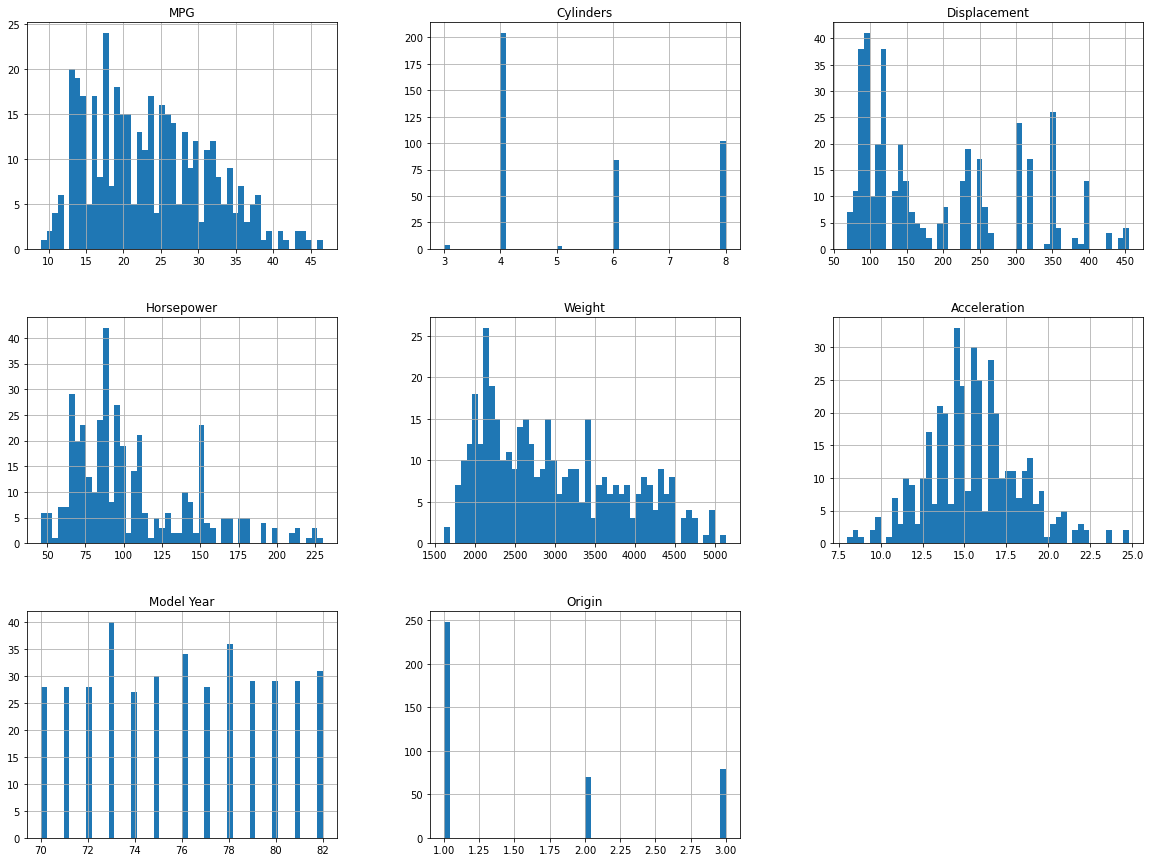

In [6]:
%matplotlib inline
# checking the graphical rep of the whole dataset(only numerical attributes)
data_mpg.hist(bins=50,figsize=(20,15))
plt.show()

### Issue with Horsepower missing values

I made a boxplot to determine how many outliers there are within the feature of horsepower and as shown we have a few outliers.

<AxesSubplot:xlabel='Horsepower'>

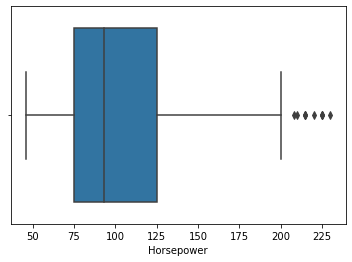

In [7]:
sns.boxplot(x = data_mpg['Horsepower'])


# Create Train/Test Split


In [8]:
y = data_mpg['MPG']
data_mpg = data_mpg.drop(columns=['MPG'])
trainX, testX, trainY, testY = train_test_split(data_mpg, y, test_size = .2, random_state=2)

#copy of trainX to update/add columns
trainX = trainX.copy()
testX = testX.copy()

# Check for Null Values


In [9]:
trainX.isnull().values.any()

True

In [10]:
trainX.isnull().values.sum()


5

In [11]:
trainX['Horsepower'].isnull().values.any()


True

## Fill in empty values

Since Horsepower has missing values I decided to use the median of the feature to fill in the missing values.

In [12]:
median = data_mpg['Horsepower'].median()
trainX['Horsepower']=trainX['Horsepower'].fillna(median)
trainX['Horsepower'].isnull().values.any()

False

In [13]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 203 to 168
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     317 non-null    int64  
 1   Displacement  317 non-null    float64
 2   Horsepower    317 non-null    float64
 3   Weight        317 non-null    float64
 4   Acceleration  317 non-null    float64
 5   Model Year    317 non-null    int64  
 6   Origin        317 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 19.8 KB


## Scaling the feature 

In [14]:
scaler = preprocessing.StandardScaler()
trainX = scaler.fit_transform(trainX)

# Linear Regression Algorithm


Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. Rather than a classification problem, linear regression is used to predict values for continuous problems such as ours: MPG(Miles Per Gallon).

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(trainX, trainY)

LinearRegression()

In [16]:
#testing the predictions
predictions = lin_reg.predict(trainX)
lin_mse = mean_squared_error(trainY, predictions)
lin_rmse = np.sqrt(lin_mse)
print("rmse:",lin_rmse)

rmse: 3.3770220664170227


# Decision Tree  Algorithm

A decision tree is a simple transparent machine learning technique where the learned function is represented in the form of a tree. Decision trees can be used as an algorithm for both regression and classification models. Essentially the decision tree breaks down a dataaset into smaller subsets creating an associated decision tree. The final result is a tree with decision nodes and leaf nodes.

In [17]:
tree = DecisionTreeRegressor()
tree.fit(trainX, trainY)

DecisionTreeRegressor()

In [18]:
predictions = tree.predict(trainX)
tree_mse = mean_squared_error(trainY, predictions)
tree_rmse = np.sqrt(tree_mse)
print("rmse:",tree_rmse)

rmse: 0.0


The rmse came back as 0, meaning there is absolutely no error. This would be amazing, however, what actually happened is that our model has extremely overfit the model. Our model has essentially performed extremely well with our training data but will perform poorly on the test data which is data that our model has never seen before.

## Cross Validation on Decision Tree Model 

One way to get a better sense of the accuracy of our model is to use cross validation. 
K-fold cross-validation will randomly split the training set into k distinct subsets called folds, then it trains and evaluates the model k times, picking a different fold for evaluation every time and training on the other (k-1) folds. By using the same training data over and over it will give us a better idea of the overall accuracy of our model.

I decided to use a value of k=10 for all cross validations since it gave better RMSE scores as well as 10 folds being one of the common values applied in machine learning models.

In [19]:
scores = cross_val_score(tree, trainX, trainY, scoring= "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores


array([2.66346813, 3.38826098, 4.292326  , 2.11578886, 2.80184091,
       6.04175575, 4.71298074, 4.3277052 , 4.34585453, 4.07015098])

In [20]:
tree_rmse = tree_rmse_scores.mean()
print("rmse: ", tree_rmse)

rmse:  3.876013209474327


## Cross Validation on Linear Regression Model

In [21]:
scores = cross_val_score(lin_reg, trainX, trainY, scoring= "neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([3.14704765, 2.75162203, 4.20558443, 3.20057484, 3.13540678,
       4.33908668, 3.4828133 , 3.78566221, 3.34024713, 3.0269735 ])

In [22]:
lin_reg_rmse = lin_reg_rmse_scores.mean()
print("rmse: ",lin_reg_rmse)

rmse:  3.441501854378192


# Random Forest Model


Random forest is a supervised learning algorithm which builds a "forest" that can be used for classification and regression problems. It provides an improvement over bagged trees by way of a small tweak that decorrelates the tree. 

In [23]:
rand_forest = RandomForestRegressor()
rand_forest.fit(trainX, trainY)


RandomForestRegressor()

In [24]:
rand_forest_scores = cross_val_score(rand_forest, trainX, trainY, scoring='neg_mean_squared_error', cv=10)
rand_forest_rmse_scores = np.sqrt(-rand_forest_scores)
rand_forest_rmse_scores

array([2.4856381 , 2.3161096 , 3.30094493, 2.21953656, 1.64676431,
       3.5386494 , 4.06963902, 2.72392536, 2.41850757, 2.94494231])

In [25]:
rand_forest_rmse = rand_forest_rmse_scores.mean()

print("rmse: ", rand_forest_rmse)

rmse:  2.7664657159242436


# Support Vector Machine Model

The object of the support vector machine algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. A hyperplane in p dimensions is a subspace of dimension p-1.

In [26]:
svm = SVR(kernel='linear')
svm.fit(trainX, trainY)
svm_scores = cross_val_score(svm, trainX, trainY, scoring='neg_mean_squared_error', cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
svm_rmse_scores

array([3.50207558, 3.11906101, 4.13285123, 3.0435626 , 3.42340206,
       4.70944108, 3.70666419, 3.83137545, 3.23666191, 3.07499219])

In [27]:
svm_rmse = svm_rmse_scores.mean()
print("rmse: ",svm_rmse)

rmse:  3.5780087289565627


## All RMSE with cross validation k=10

In [28]:
all_rmse = [lin_reg_rmse,
            tree_rmse,
        rand_forest_rmse,
        svm_rmse
       ]
value = pd.DataFrame(all_rmse)
new_value_train = value.rename(columns = {0: 'RMSE'}, index={0: 'LinearRegression', 1: 'DecisionTreeRegression', 2: 'RandomForestRegression', 3: 'SVR',})
new_value_train

,RMSE
LinearRegression,3.441502
DecisionTreeRegression,3.876013
RandomForestRegression,2.766466
SVR,3.578009


As we can see in the chart above, the Random Forest Regression Algorithm with a cross valdiation of 10 folds gave us the lowest RMSE out of the other algorithms. We can also see that through cross validation our Decision Tree Regression model did not give us an RMSE of 0 and the RMSE of Linear Regression has decreased from the RMSE of the Linear Regression model without cross validation.

# Testing Trained Data

In [29]:
testX.isnull().values.any()

True

In [30]:
testX.isnull().values.sum()

1

In [31]:
testX['Horsepower'].isnull().values.any()


True

In [32]:
median = data_mpg['Horsepower'].median()
testX['Horsepower']=testX['Horsepower'].fillna(median)
testX['Horsepower'].isnull().values.any()

False

In [33]:
testX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 94 to 278
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     80 non-null     int64  
 1   Displacement  80 non-null     float64
 2   Horsepower    80 non-null     float64
 3   Weight        80 non-null     float64
 4   Acceleration  80 non-null     float64
 5   Model Year    80 non-null     int64  
 6   Origin        80 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.0 KB


In [34]:
scaler = preprocessing.StandardScaler()
testX = scaler.fit_transform(testX)

# Testing on Linear Regression Model 

In [35]:
predicted = lin_reg.predict(testX)

lin_predict_mse = mean_squared_error(testY, predicted)
lin_predict_rmse = np.sqrt(lin_predict_mse)
print("rmse: ",lin_predict_rmse)

rmse:  3.013554414277359


# Testing on Decision Tree Model

In [36]:
predicted = tree.predict(testX)

tree_predict_mse = mean_squared_error(testY, predicted)
tree_predict_rmse = np.sqrt(tree_predict_mse)
print("rmse: ",tree_predict_rmse)

rmse:  3.5359934954691306


# Testing on Random Forest Model

In [37]:
predicted = rand_forest.predict(testX)

rand_forest_predict_mse = mean_squared_error(testY, predicted)
rand_forest_predict_rmse = np.sqrt(rand_forest_predict_mse)

print("rmse:", rand_forest_predict_rmse)

rmse: 2.746133959769624


# Testing on SVM

In [38]:
predicted = svm.predict(testX)

svm_predict_mse = mean_squared_error(testY, predicted)
svm_predict_rmse = np.sqrt(svm_predict_mse)
print("rmse: ",svm_predict_rmse)

rmse:  3.199821359068105


# All RMSE for Test

In [39]:
test = [lin_predict_rmse,
        tree_predict_rmse,
        rand_forest_predict_rmse,
        svm_predict_rmse
       ]
value = pd.DataFrame(test)
new_value_test= value.rename(columns = {0: 'RMSE'}, index={0: 'LinearRegression', 1: 'DecisionTreeRegression', 2: 'RandomForestRegression', 3: 'SVR',})
new_value_test

,RMSE
LinearRegression,3.013554
DecisionTreeRegression,3.535993
RandomForestRegression,2.746134
SVR,3.199821


# Compare RMSE for Training and Testing

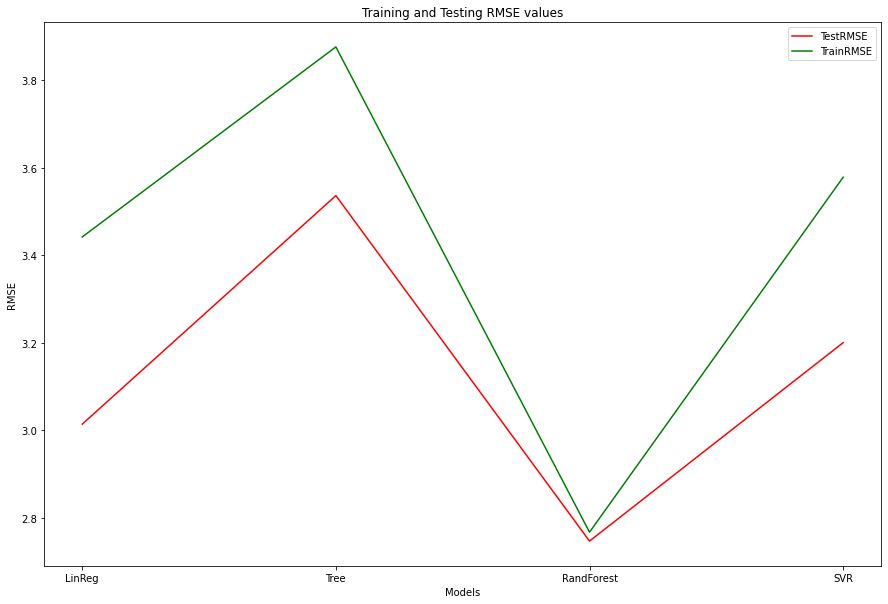

In [40]:
samples = np.array(['LinReg', 'Tree', 'RandForest', 'SVR'])
plt.figure(1, figsize=(15,10))
plt.plot(samples, new_value_test.iloc[:,0], 'r', label='TestRMSE')
plt.plot(samples, new_value_train.iloc[:,0], 'g', label='TrainRMSE')
plt.title("Training and Testing RMSE values")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.legend()
plt.show()

As seen in the plot above, the RMSE of the training and testing data are very similar with no extreme differences meaning that we have built good models. If the RMSE for the test set is much higher than that of the training set, it is most likely that we have overfit the data but in our case we did not. We also see that the RMSE of the test data is lower than that of the training data.

# Fine Tuning Random Forest Model

As shown in the training RMSE, Random Forest Algorithm did the best out of the other ones performance wise. I decided that I wanted to fine tune our model more with hyperparameter to figure out which set of parameters of the random forest regressor works the best and improve the performance.

## Hyperparameter Tuning with GridSearchCV


As learned in class, hyperparameter, is a parameter whose value is set to control the learning process. It is set before the learning takes place and can be altered to fine tune the learning model. Since the best model within the training was Random Forest, I decided to implement a hyperparameter tuning with GridSearchCV. By using GridSearchCV under sklearn, it will take some values that we want to experiment with and uses cross validation to evaluate the model on each hyperparameter values. 

In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (n_estimators and max_features)

In my parameter set up I will work with 12 combinations in total with 3 different estimators and 4 different feature params.

In [41]:
#list of dictionaries
# will work with 12 combinations 
params = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

rand_forest = RandomForestRegressor()


param_search = GridSearchCV(rand_forest, params, scoring='neg_mean_squared_error', return_train_score=True, cv=10)

#train
param_search.fit(trainX, trainY)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
param_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [43]:
scores = param_search.cv_results_


#printing all the parameters along with their scores
for mean_score, params in zip(scores['mean_test_score'],scores["params"]):
    print(np.sqrt(-mean_score), params)

3.304774890120772 {'max_features': 2, 'n_estimators': 3}
3.1342383557356506 {'max_features': 2, 'n_estimators': 10}
2.933738520555172 {'max_features': 2, 'n_estimators': 30}
3.1302021395730684 {'max_features': 4, 'n_estimators': 3}
3.0025807850860136 {'max_features': 4, 'n_estimators': 10}
2.9366347801123025 {'max_features': 4, 'n_estimators': 30}
3.079922063116947 {'max_features': 6, 'n_estimators': 3}
3.0720385260678555 {'max_features': 6, 'n_estimators': 10}
2.843267457582818 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
3.507850354975712 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.1321398806335 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.22725942635821 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.0836470915266303 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
3.0585486175729404 {'bootstrap': Fals

## Figure out the weight of each feature 

In [44]:
weight_of_each_feature = param_search.best_estimator_.feature_importances_
weight_of_each_feature

array([0.18487702, 0.33867378, 0.10961592, 0.20689223, 0.02558224,
       0.12980598, 0.00455283])

In [ ]:
data_types = ['float64', 'int64']
features = list(data_mpg.select_dtypes(include=data_types))

sorted(zip(features, weight_of_each_feature), reverse=True)

## Improvement of RMSE for Random Forest 

In [46]:
final_model = param_search.best_estimator_

final_predictions = final_model.predict(testX)
final_mse = mean_squared_error(testY, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.716607386878797

The testing RMSE after hyperparameter gave an RMSE of 2.7166 which is an improvement to the testing RMSE, 2.746134, of our Random Forest Regressor without hyperparameter.

# Conclusion/ Future Work

Overall the project is meant to predict MPG(miles per gallon) of cars based on specific features of the car: {Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, Origin}. I used 4 different algorithms, Linear regression, Decision Tree regression, Random Forest regression and SVM. By training and testing on these 4 models I have come to the conclusion that the Random Forest regression gives the best performance out of the rest with lower RMSE values.

Since the RMSE was the lowest for the Random Forest model, I decided to use hyperparameters to make my model have a better performance and can be shown that the RMSE was slightly lower. The random forest model did the best because a random forest is a collection of decision trees. Thus, in each tree we can utilize random features and eventually many or all of our features will have been included. The forests aggregate many decision trees to limit overfitting as well as error due to bias and therefore yields useful results.

If I had more time or more teammates I would want to work with hyperparameters for decision trees with leaf sizes as well as testing on more regression models that I have not learned in class.